In [1607]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_price.txt')

In [1608]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [1609]:
df.shape

(21597, 21)

In [1610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1611]:
X = df.drop(columns=['price'])
y = df['price']

In [1612]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

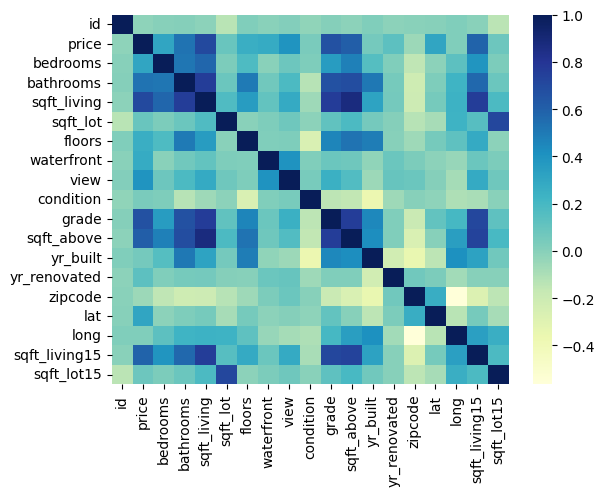

In [1613]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

In [1614]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<AxesSubplot:>

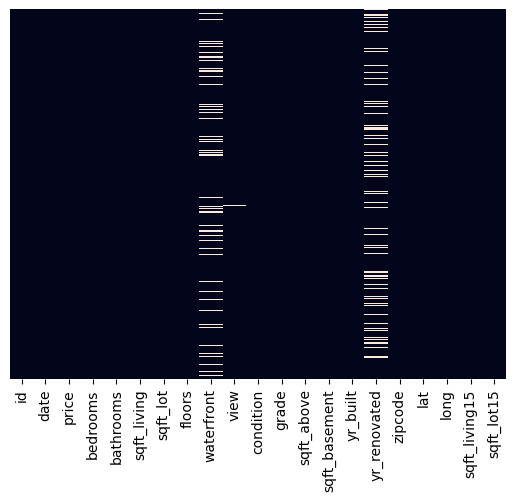

In [1615]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [1616]:
X.isnull().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1617]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [1618]:
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

In [1619]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [1620]:
df['view'] = df['view'].fillna(df['view'].mode()[0])

In [1621]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

In [1622]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [1623]:
df = df.drop(columns=["yr_renovated"])

In [1624]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [1625]:
df= df.drop(df[df['sqft_basement']=='?'].index)

In [1626]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [1627]:
df = df.drop(columns = ['date', 'id'])

In [1628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  float64
 7   view           21143 non-null  float64
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21143 non-null  int64  
 13  zipcode        21143 non-null  int64  
 14  lat            21143 non-null  float64
 15  long           21143 non-null  float64
 16  sqft_living15  21143 non-null  int64  
 17  sqft_lot15     21143 non-null  int64  
dtypes: flo

In [1629]:
df['sqft_above'].unique()

array([1180, 2170,  770, 1050, 1680, 3890, 1060, 1890, 1860,  860, 1430,
       1370, 1810, 1980, 1600, 1250, 2330, 2270, 1070, 2450, 1710, 1750,
       1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930, 2360,  890,
       2620, 2600, 1570,  920, 3160,  990, 2290, 2165, 1640, 1000, 2130,
       2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519, 1540, 1110, 1770,
       2720, 2240, 3070, 2380, 2390,  880, 1040,  910, 2350, 1900, 1010,
        960, 2660, 1610,  765, 3520, 1200, 1290, 1960, 1160, 1210, 1270,
       1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030, 2310,  700, 1080,
       2520, 1560, 1450, 1720, 2910, 1620, 1360, 2070, 2460, 1390, 2140,
       1320, 1340, 1550,  940, 1380, 3670, 2370, 1130,  980, 3540, 2500,
       1760, 1030, 1780, 3400, 2680, 1670, 2590,  820, 1220, 2440, 2090,
       1100, 1330, 1420, 1690, 2150, 1910, 1350, 1940,  900, 1630, 2714,
        850, 1870, 1950, 2760, 2020, 1120, 1480, 1230, 2280, 3760, 3530,
        830, 1300, 2740, 1830,  720, 2010, 3360,  8

In [1630]:
df['sqft_living'].unique

<bound method Series.unique of 0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21143, dtype: int64>

In [1631]:
df =df.drop(columns=['sqft_above'])

In [1632]:
corr =df.corr().abs()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.394885,0.035290,0.667738,0.325008,0.054459,0.053166,0.306507,0.022101,0.586415,0.083192
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,0.356882,0.302683,0.157017,0.152628,0.009521,0.131093,0.392476,0.030479
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,0.128015,0.666493,0.282693,0.508408,0.204306,0.024994,0.224479,0.570129,0.088834
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,0.061294,0.763101,0.434576,0.319461,0.198906,0.052986,0.240797,0.756389,0.184466
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,0.007522,0.021211,0.072420,0.009671,0.113402,0.015533,0.052768,0.129355,0.085457,0.230583,0.143428,0.720649
floors,0.256355,0.179044,0.504071,0.354688,0.007522,1.000000,0.020307,0.027727,0.264280,0.459214,0.245144,0.489665,0.058976,0.048977,0.125922,0.280294,0.011545
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,0.083602,0.084949,0.023843,0.028152,0.011567,0.036371,0.085174,0.030250
view,0.394885,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,0.249354,0.275440,0.054330,0.085097,0.006375,0.076119,0.280282,0.072555
condition,0.035290,0.025710,0.128015,0.061294,0.009671,0.264280,0.016728,0.045355,1.000000,0.148508,0.170972,0.362107,0.003437,0.015592,0.106285,0.093493,0.004860
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.249354,0.148508,1.000000,0.168023,0.448120,0.185131,0.113380,0.199187,0.713574,0.121921


In [1633]:
df = df.drop(columns = corr[corr.price<0.04].index)

In [1634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  float64
 7   view           21143 non-null  float64
 8   grade          21143 non-null  int64  
 9   sqft_basement  21143 non-null  float64
 10  yr_built       21143 non-null  int64  
 11  zipcode        21143 non-null  int64  
 12  lat            21143 non-null  float64
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 2.6 MB


In [1635]:
# X = df.drop(columns= ['price'])
# y = df.price

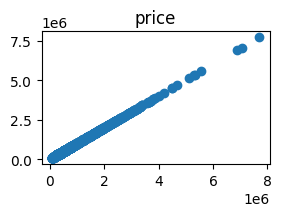

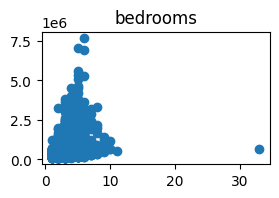

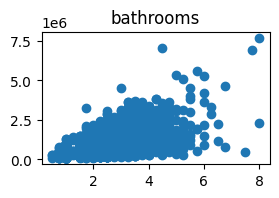

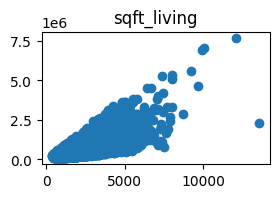

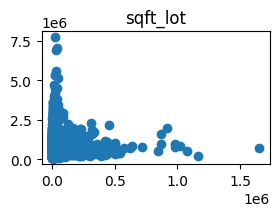

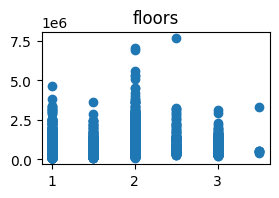

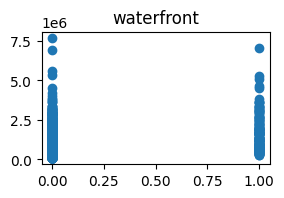

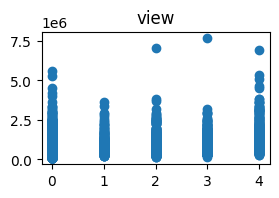

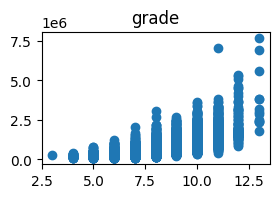

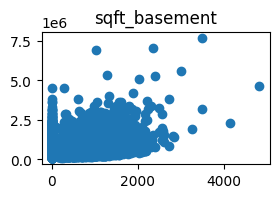

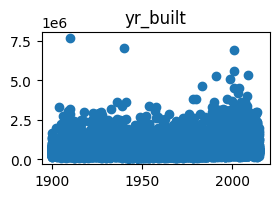

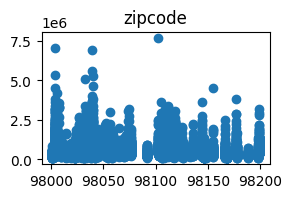

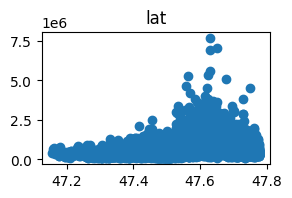

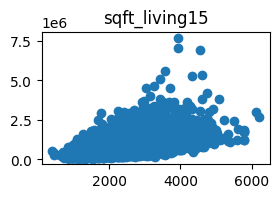

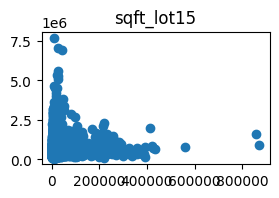

In [1636]:
for i in range(df.columns.shape[0]):
    plt.figure(figsize=(10,10))
    plt.subplot(5, 3, 1+i)
    plt.scatter(df[df.columns[i]].values, df.price.values)
    plt.title(df.columns[i])
plt.show()

In [1637]:
drop_rows =[]

In [1638]:
drop_rows.append(df[df['bedrooms']==np.sort(df['bedrooms'])[::-1][0]].index[0])

In [1639]:
for i in np.sort(df['bathrooms'])[::-1][:4]:
    drop_rows.append(df[df['bathrooms']== i].index[0])

In [1640]:
for i in np.sort(df['sqft_living'])[::-1][:3]:
    drop_rows.append(df[df['sqft_living']== i].index[0])
    

In [1641]:
for i in np.sort(df['sqft_lot15'])[::-1][:3]:
    drop_rows.append(df[df['sqft_lot15']== i].index[0])

In [1642]:
drop_rows.append(df[df['sqft_lot']==np.sort(df['sqft_lot'])[::-1][0]].index[0])


In [1643]:
for i in np.sort(df['sqft_basement'])[::-1][:6]:
    drop_rows.append(df[df['sqft_basement']== i].index[0])


In [1644]:
drop_rows = np.unique(drop_rows)

In [1645]:
df = df.drop(drop_rows)

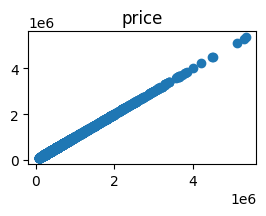

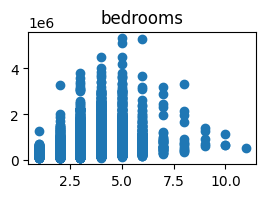

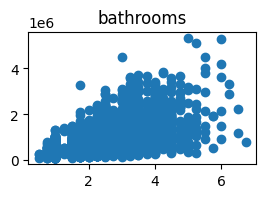

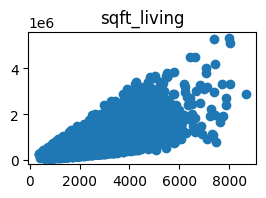

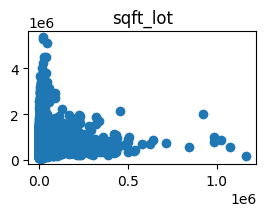

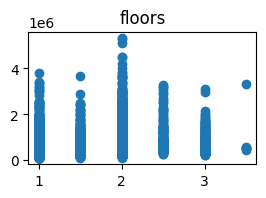

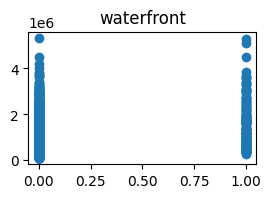

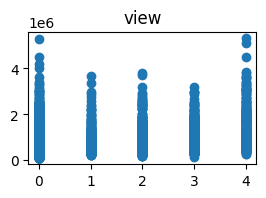

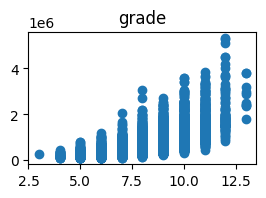

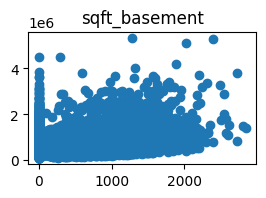

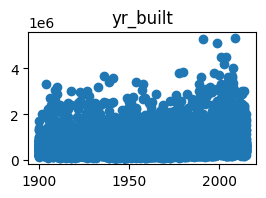

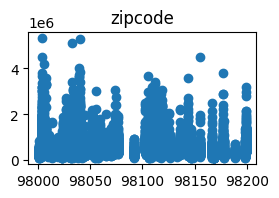

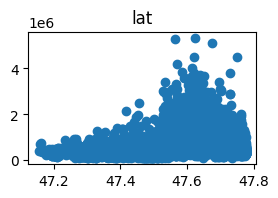

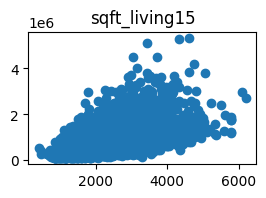

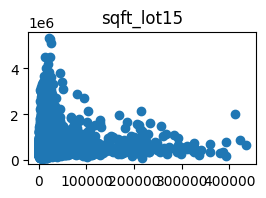

In [1646]:
for i in range(df.columns.shape[0]):
    plt.figure(figsize=(10,10))
    plt.subplot(5, 3, 1+i)
    plt.scatter(df[df.columns[i]].values, df.price.values)
    plt.title(df.columns[i])
plt.show()

In [1647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21129 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21129 non-null  float64
 1   bedrooms       21129 non-null  int64  
 2   bathrooms      21129 non-null  float64
 3   sqft_living    21129 non-null  int64  
 4   sqft_lot       21129 non-null  int64  
 5   floors         21129 non-null  float64
 6   waterfront     21129 non-null  float64
 7   view           21129 non-null  float64
 8   grade          21129 non-null  int64  
 9   sqft_basement  21129 non-null  float64
 10  yr_built       21129 non-null  int64  
 11  zipcode        21129 non-null  int64  
 12  lat            21129 non-null  float64
 13  sqft_living15  21129 non-null  int64  
 14  sqft_lot15     21129 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 2.6 MB


In [1648]:
X = df.drop(columns= ['price'])
y = df.price

In [1649]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [1650]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1651]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [1652]:
linear.coef_

array([-3.21053428e+04,  4.64339362e+04,  1.54319047e+02,  2.20825451e-02,
        1.37815550e+04,  5.89425123e+05,  5.70490181e+04,  1.02944811e+05,
       -5.49511557e+00, -3.07435690e+03, -4.03735446e+02,  5.92880191e+05,
        1.84382695e+01, -4.54703230e-01])

In [1653]:
linear.intercept_

16830416.089742884

In [1654]:
linear.predict([X_test.iloc[0]])

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([385674.03853857])

In [1655]:
y_test.iloc[0]

265000.0

In [1656]:
linear.score(X_test, y_test)

0.7018768796057138